# The Patents API: Features Overview

This tutorial provides an overview of the [Patents data source](https://docs.dimensions.ai/dsl/datasource-patents.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 

The topics covered in this notebook are:

* How to retrieve patents metadata using the [search fields](https://docs.dimensions.ai/dsl/datasource-patents.html) available
* How to use the [schema API](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api) to obtain some statistics about the Patents data available (note: the charts generated in this section are also available online: [patents fields overview ](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-overview.html) | [yearly distribution of patents fields](http://api-sample-data.dimensions.ai/dataviz-exports/1-introducing-patents/patents-fields-by-year-count.html) ).

In [37]:
from datetime import datetime
print("Last run: ", datetime.today().strftime('%d %B %Y'))

Last run:  13 October 2020


## Prerequisites

This notebook assumes you have installed the [Dimcli](https://pypi.org/project/dimcli/) library and are familiar with the *Getting Started* tutorial.


In [1]:
!pip install dimcli plotly tqdm -U --quiet 

import dimcli
from dimcli.utils import *

import sys, json, time
from tqdm.notebook import tqdm as progress
import pandas as pd
import plotly.express as px
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)
#

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

==
Logging in..
Dimcli - Dimensions API Client (v0.8.2)
Connected to: https://app.dimensions.ai - DSL v1.28
Method: dsl.ini file


## 1. Sample Patents Queries

For the following queries, we will restrict our search using the keyword `nanotubes`. You can of course change that, so to explore other topics too.

In [5]:
TOPIC = "nanotubes" #@param {type: "string"}

### Searching patents by keyword

We can easily discover patents mentioning the keyword `nanotubes` and sorting them by most recent first. 

In [13]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where year is not empty
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()

Returned Patents: 200 (total = 33662)
Time: 1.00s


In [14]:
df.head(3)

,legal_status,assignee_names,publication_date,jurisdiction,filing_status,title,inventor_names,id,assignees,year,times_cited,granted_year
0,Granted,[ARKEMA FRANCE],2020-10-09,FR,Application,Procédé de préparation d’une composition pâteu...,"[Oleksandr KORZHENKO, Christophe Vincendeau, P...",FR-3094710-A1,"[{'id': 'grid.423748.e', 'latitude': 48.90901,...",2019,0,NaN
1,Pending,"[HON HAI PRECISION INDUSTRY CO., LTD., Tsinghu...",2020-10-08,US,Application,METHOD FOR MAKING NANOPOROUS NICKEL COMPOSITE ...,"[Ze-Cheng Hou, Yuan-Feng Liu, Lin Zhu, WEN-ZHE...",US-20200321602-A1,"[{'id': 'grid.471047.1', 'latitude': 25.28992,...",2019,0,NaN
2,Granted,"[FURUKAWA ELECTRIC CO., LTD.]",2020-10-08,WO,Application,CONNECTION STRUCTURE FOR SUBSTRATE AND CARBON ...,"[YAMASHITA SATOSHI, HATAMOTO KENJI]",WO-2020203725-A1,"[{'id': 'grid.459529.6', 'latitude': 35.68007,...",2020,0,NaN


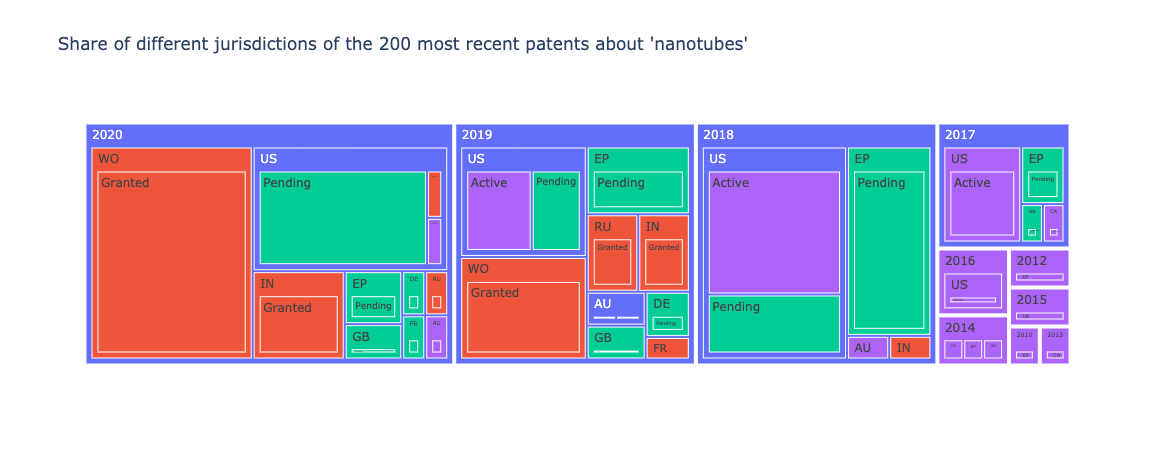

In [15]:
temp = df.copy()
temp['tot'] = 1
px.treemap(
    temp, 
    path=['year', 'jurisdiction' ,'legal_status'], 
    color="legal_status",
    values='tot',
    title=f"Share of different jurisdictions of the 200 most recent patents about '{TOPIC}'"
)

### Searching using fielded search

We can search for Patents by using one or more [field filters](https://docs.dimensions.ai/dsl/datasource-patents.html#patents-fields). 

For example, we can filter by `legal_status`, to get only the 'active' patents.

In [16]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where legal_status = "Active"
return patents[basics+jurisdiction+legal_status] 
    sort by publication_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 5962)
Time: 0.93s


,filing_status,publication_date,year,title,granted_year,times_cited,assignee_names,assignees,id,jurisdiction,inventor_names,legal_status
0,Grant,2020-10-07,2012,CHEMICAL SENSOR BASED ON HIGHLY ORGANIZED SING...,2020,0,"[Northeastern University, Boston, Northeastern...","[{'id': 'grid.412252.2', 'linkout': ['http://e...",EP-2745102-B1,EP,"[BUSNAINA AHMED, JUNG YUNG JOON, SOMU SIVASUBR...",Active
1,Grant,2020-10-07,2010,HIGH PERFORMANCE CARBON NANOTUBE ENERGY STORAG...,2020,0,"[ZAPGO LTD, Zapgo Ltd]",NaN,EP-2517219-B1,EP,"[NGUYEN CATTIEN VAN, NIEMANN DARRELL LEE]",Active
2,Grant,2020-10-07,2012,HYBRID POLYMER COMPOSITE FIBER INCLUDING GRAPH...,2020,0,[Industry University Cooperation Foundation IU...,NaN,EP-2698457-B1,EP,"[KIM SEON JEONG, SHIN MIN KYOON, KIM SHI HYEONG]",Active
3,Grant,2020-10-07,2014,"NANOTUBE BASED TRANSISTOR STRUCTURE, METHOD OF...",2020,0,[Yeda Research and Development Co Ltd],"[{'id': 'grid.471336.4', 'linkout': ['http://w...",EP-3066701-B1,EP,"[SHAHAL ILANI, PECKER SHARON, BENYAMINI AVISHA...",Active
4,Grant,2020-10-06,2019,Method for producing boron nitride nanotube-re...,2020,0,[Hitachi Metals Ltd],"[{'id': 'grid.417547.4', 'linkout': ['http://w...",US-10793938-B2,US,"[Makoto Okai, Hideki Yamaura, Kazutoshi SUGIE,...",Active


#### Searching using dates

In [17]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where granted_date is not empty
return patents[id+title+expiration_date+granted_date+publication_date+legal_status+jurisdiction] 
    sort by granted_date limit 200
""").as_dataframe()
df.head()

Returned Patents: 200 (total = 8703)
Time: 1.13s


,id,jurisdiction,title,legal_status,publication_date,granted_date,expiration_date
0,EP-2745102-B1,EP,CHEMICAL SENSOR BASED ON HIGHLY ORGANIZED SING...,Active,2020-10-07,2020-10-07,2032-08-20
1,EP-2517219-B1,EP,HIGH PERFORMANCE CARBON NANOTUBE ENERGY STORAG...,Active,2020-10-07,2020-10-07,2030-12-20
2,EP-2698457-B1,EP,HYBRID POLYMER COMPOSITE FIBER INCLUDING GRAPH...,Active,2020-10-07,2020-10-07,2032-03-09
3,EP-3066701-B1,EP,"NANOTUBE BASED TRANSISTOR STRUCTURE, METHOD OF...",Active,2020-10-07,2020-10-07,2034-11-06
4,US-10793938-B2,US,Method for producing boron nitride nanotube-re...,Active,2020-10-06,2020-10-06,2039-06-06


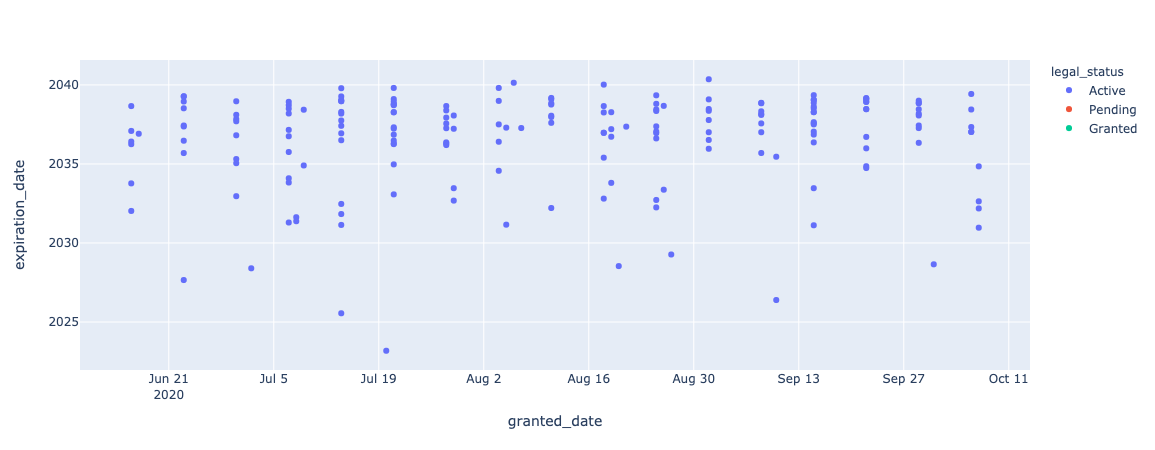

In [18]:
px.scatter(df, 
          x="granted_date", y="expiration_date", 
           hover_name="title",
           color="legal_status")

### Extracting cited publications via `publication_ids`

In [19]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+publication_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6482)
Time: 1.05s


,publication_ids,inventor_names,id,assignees,year,times_cited,assignee_names,granted_year,publication_date,filing_status,title
0,[pub.1091808893],"[LI JUNTAO, CHENG KANGGUO, LEE CHOONGHYUN, XU ...",US-10559675-B2,"[{'id': 'grid.410484.d', 'latitude': 41.10854,...",2017,1,[International Business Machines Corp],2020.0,2020-02-11,Grant,Stacked silicon nanotubes
1,"[pub.1004222615, pub.1068952232]","[PEARL JR WILLIAM CECIL, RAVI KRISHNA, DIAS TO...",US-10557075-B2,"[{'id': 'grid.455973.9', 'latitude': 29.788263...",2018,0,[Halliburton Energy Services Inc],2020.0,2020-02-11,Grant,Overcoming the retardation of cement hydration...
2,[pub.1028808507],"[BORG MATTIAS, MOSELUND KIRSTEN, SCHMID HEINZ,...",US-10559657-B2,"[{'id': 'grid.410484.d', 'latitude': 41.10854,...",2018,0,[International Business Machines Corp],2020.0,2020-02-11,Grant,Fabrication of semiconductor junctions
3,"[pub.1047382005, pub.1013802592]","[BODAY DYLAN J, FEVRE MAREVA B, GARCIA JEANNET...",US-10557008-B2,"[{'id': 'grid.410484.d', 'latitude': 41.10854,...",2017,0,[International Business Machines Corp],2020.0,2020-02-11,Grant,Porous materials and method of making porous m...
4,[pub.1035121240],[LAHALIH SHAWQUI M],EP-3605689-A1,"[{'id': 'grid.453496.9', 'latitude': 29.337202...",2019,0,[Kuwait Institute for Scientific Research],NaN,2020-02-05,Application,METHOD OF MAKING A NANOCOMPOSITE POLYELECTROLY...


In [20]:
pubs = df.explode('publication_ids').drop_duplicates(subset='publication_ids')['publication_ids'].to_list()
print(len(pubs), "publications found")

559 publications found


Let's get the pubs metadata for some of them:

In [21]:
df = dsl.query(f"""
search publications
    where id in {json.dumps(pubs[:200])}
return publications[id+doi+title+year] 
    limit 1000
""").as_dataframe()
df.head()

Returned Publications: 200 (total = 200)
Time: 0.79s


,id,year,title,doi
0,pub.1100838722,2018,Robust water desalination membranes against de...,10.1038/s41598-018-21192-5
1,pub.1101400567,2018,Large-scale polymeric carbon nanotube membrane...,10.1126/sciadv.1700938
2,pub.1092252229,2017,Bottom-up precise synthesis of stable platinum...,10.1038/s41467-017-01259-z
3,pub.1092197955,2017,Enhanced Flux and Electrochemical Cleaning of ...,10.1021/acsami.7b12615
4,pub.1091343514,2017,Enhanced water permeability and tunable ion se...,10.1126/science.aan2438


### Extracting cited patents via `reference_ids`

In [22]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
    where publication_ids is not empty
return patents[basics+reference_ids] 
    sort by publication_date limit 100
""").as_dataframe()
df.head()

Returned Patents: 100 (total = 6482)
Time: 0.79s


,filing_status,publication_date,year,title,granted_year,times_cited,assignee_names,assignees,reference_ids,id,inventor_names
0,Grant,2020-02-11,2017,Stacked silicon nanotubes,2020.0,1,[International Business Machines Corp],"[{'id': 'grid.410484.d', 'linkout': ['http://w...","[US-8679902-B1, US-20130032777-A1, US-20050051...",US-10559675-B2,"[LI JUNTAO, CHENG KANGGUO, LEE CHOONGHYUN, XU ..."
1,Grant,2020-02-11,2018,Overcoming the retardation of cement hydration...,2020.0,0,[Halliburton Energy Services Inc],"[{'id': 'grid.455973.9', 'linkout': ['http://w...","[US-10202536-B2, US-20130213638-A1, US-8598093...",US-10557075-B2,"[PEARL JR WILLIAM CECIL, RAVI KRISHNA, DIAS TO..."
2,Grant,2020-02-11,2018,Fabrication of semiconductor junctions,2020.0,0,[International Business Machines Corp],"[{'id': 'grid.410484.d', 'linkout': ['http://w...","[US-20130178019-A1, US-8153494-B2, US-7589347-...",US-10559657-B2,"[BORG MATTIAS, MOSELUND KIRSTEN, SCHMID HEINZ,..."
3,Grant,2020-02-11,2017,Porous materials and method of making porous m...,2020.0,0,[International Business Machines Corp],"[{'id': 'grid.410484.d', 'linkout': ['http://w...","[US-3598748-A, US-20160257785-A1, US-201701142...",US-10557008-B2,"[BODAY DYLAN J, FEVRE MAREVA B, GARCIA JEANNET..."
4,Application,2020-02-05,2019,METHOD OF MAKING A NANOCOMPOSITE POLYELECTROLY...,NaN,0,[Kuwait Institute for Scientific Research],"[{'id': 'grid.453496.9', 'linkout': ['http://w...","[EP-2666202-A1, US-20150332802-A1, US-20160096...",EP-3605689-A1,[LAHALIH SHAWQUI M]


In [23]:
cited_patents = df.explode('reference_ids').drop_duplicates(subset='reference_ids')['reference_ids'].to_list()
print(len(cited_patents), "cited patents found")

1631 cited patents found


### Aggregating results using facets

Patents results can be grouped using facets. E.g. we can see what are the top `assignees`, `researchers` or  `category_for` related to our patents (note: the column 'count' represents the number of patent records in each of the groups).

#### Top assignees

In [24]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return assignees limit 100
""").as_dataframe()
df.head()

Returned Assignees: 100
Time: 0.57s


,id,count,latitude,name,country_name,types,longitude,linkout,city_name,state_name,acronym
0,grid.471047.1,2147,25.289920,Foxconn (Taiwan),Taiwan,[Company],121.54920,[http://www.foxconn.com/],Banqiao District,NaN,NaN
1,grid.12527.33,2017,39.999584,Tsinghua University,China,[Education],116.32542,[http://www.tsinghua.edu.cn/publish/newthuen/],Beijing,Beijing,THU
2,grid.419666.a,966,37.496610,Samsung (South Korea),South Korea,[Company],127.02690,[http://www.samsung.com/sec/home/],Seoul,NaN,NaN
3,grid.410484.d,854,41.108540,IBM (United States),United States,[Company],-73.72047,[http://www.ibm.com/],Armonk,New York,NaN
4,grid.21940.3e,688,29.717674,Rice University,United States,[Education],-95.40184,[http://www.rice.edu/],Houston,Texas,NaN


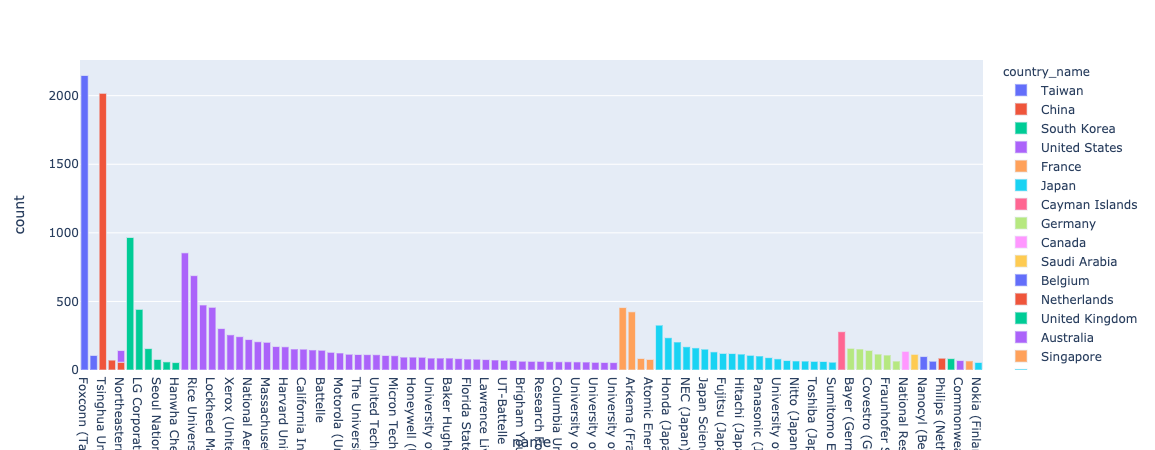

In [25]:
px.bar(df, x="name", y="count", color="country_name")

#### Top researchers

In [26]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return researchers limit 100
""").as_dataframe()
df.head()

Returned Researchers: 100
Time: 0.82s


,id,count,research_orgs,last_name,first_name,orcid_id
0,ur.01013717360.95,1711,"[grid.495569.2, grid.168010.e, grid.20513.35, ...",Fan,Shou-Shan,NaN
1,ur.01327532251.18,1043,"[grid.495569.2, grid.11135.37, grid.12527.33]",Jiang,Kai-Li,[0000-0002-1547-5848]
2,ur.01336230527.99,233,"[grid.495569.2, grid.41156.37, grid.12527.33, ...",Li,Qun-Qing,[0000-0001-9565-0855]
3,ur.0603211336.18,194,"[grid.170205.1, grid.17635.36, grid.21925.3d, ...",Smalley,Richard E,NaN
4,ur.01207162641.08,160,"[grid.262273.0, grid.63054.34, grid.21940.3e, ...",Rinzler,Andrew Gabriel,NaN


#### Top FOR categories

In [27]:
df = dsl.query(f"""
search patents 
    in title_abstract_only for "{TOPIC}" 
return category_for limit 100
""").as_dataframe()
df.head()

Returned Category_for: 94
Time: 0.56s


,id,count,name
0,2209,13982,09 Engineering
1,2203,11007,03 Chemical Sciences
2,2921,9494,0912 Materials Engineering
3,2471,7717,0306 Physical Chemistry (incl. Structural)
4,2210,7042,10 Technology


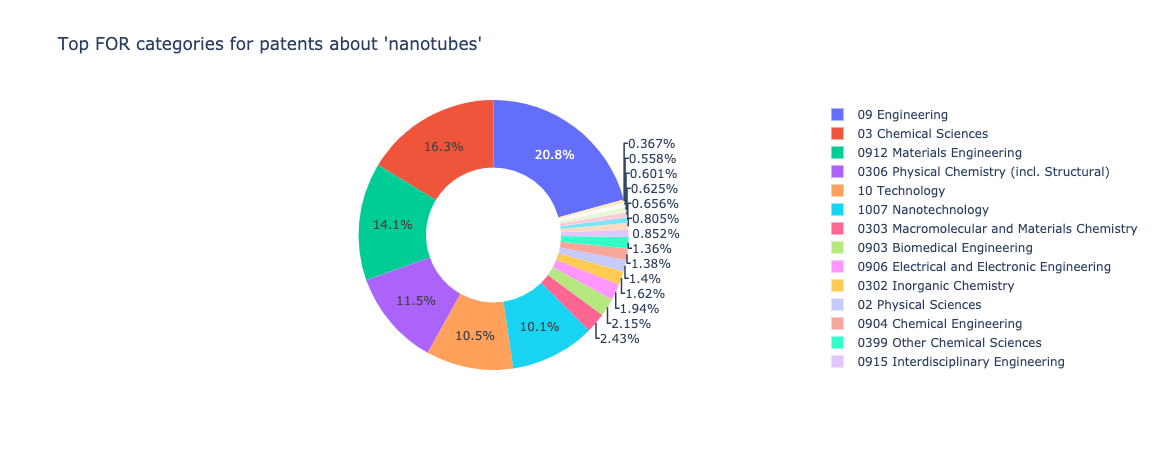

In [28]:
px.pie(df[:20], names="name", values="count", hole=0.5,
       title=f"Top FOR categories for patents about '{TOPIC}'")

## 2. A closer look at Patents statistics

The Dimensions Search Language [exposes programmatically metadata](https://docs.dimensions.ai/dsl/data-sources.html#metadata-api), such as supported sources and entities, along with their fields, facets, fieldsets, metrics and search fields. 


In [29]:
%dsldocs patents

,sources,field,type,description,is_filter,is_entity,is_facet
0,patents,abstract,string,Abstract or description of the patent.,False,False,False
1,patents,additional_filters,string,"Additional filters describing the patents, e.g...",True,False,False
2,patents,assignee_cities,cities,"City of the assignees of the patent, expressed...",True,True,True
3,patents,assignee_countries,countries,"Country of the assignees of the patent, expres...",True,True,True
4,patents,assignee_names,string,"Name of assignees of the patent, as they appea...",True,False,False
5,patents,assignee_state_codes,states,"State of the assignee, expressed using GeoName...",True,True,True
6,patents,assignees,organizations,Disambiguated GRID organisations who own or ha...,True,True,True
7,patents,associated_grant_ids,string,Dimensions IDs of the grants associated to the...,True,False,False
8,patents,category_bra,categories,`Broad Research Areas <https://dimensions.fres...,True,True,True
9,patents,category_for,categories,`ANZSRC Fields of Research classification <htt...,True,True,True


The fields list shown above can be extracted via the following DSL query:

In [30]:
data = dsl.query("""describe source patents""")
fields = sorted([x for x in data.fields.keys()])

### Counting records per each field

By using the fields list obtained above, it is possible to draw up some general statistics re. the Patents content type in Dimensions.

In order to do this, we  use the operator `is not empty` to generate automatically queries like this `search patents where {field_name} is not empty return patents limit 1` and then use the `total_count` field in the JSON we get back for our statistics. 

In [31]:
q_template = """search patents where {} is not empty return patents[id] limit 1"""

# seed results with total number of orgs
total = dsl.query("""search patents return patents[id] limit 1""", verbose=False).count_total
stats = [
    {'filter_by': 'no filter (=all records)', 'results' : total}
]

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False)
    time.sleep(0.5)
    stats.append({'filter_by': f, 'results' : res.count_total})


df = pd.DataFrame().from_dict(stats)
df.sort_values("results", inplace=True, ascending=False)
df

,filter_by,results
0,no filter (=all records),54540989
39,publication_date,54540989
34,legal_status,54540989
33,jurisdiction,54540989
30,id,54540989
25,filing_status,54540989
23,dimensions_url,54540989
41,publication_year,53598081
22,date_inserted,53598081
21,date,51952088


### Creating a bar chart


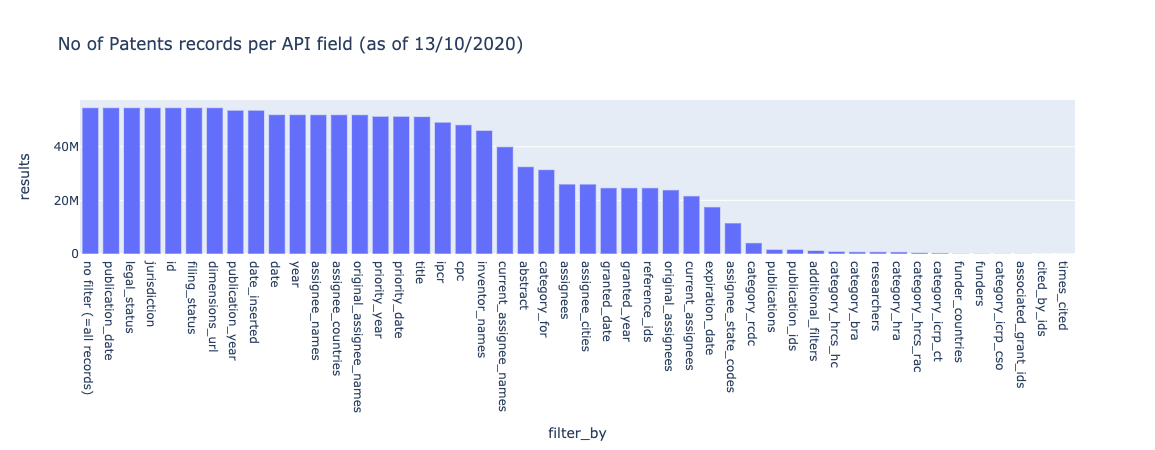

In [32]:
from datetime import date
today = date.today().strftime("%d/%m/%Y")

from plotly.offline import plot
fig = px.bar(df, x=df['filter_by'], y=df['results'],
             title=f"No of Patents records per API field (as of {today})")
plot(fig, filename = 'patents-fields-overview.html', auto_open=False)
fig.show()

### Counting the yearly distribution of field/records data 



In [33]:
#
# get how many records have values for each field, for each year
#

q_template = """search patents where {} is not empty return year limit 150"""

# seed with all records data (no filter)
seed = dsl.query("""search patents return year limit 150""", verbose=False).as_dataframe()
seed['segment'] = "all records"

for f in progress(fields):
    q = q_template.format(f)
    res = dsl.query(q, verbose=False).as_dataframe()
    res['segment'] = f
    seed = seed.append(res, ignore_index=True )
    time.sleep(0.5)

seed = seed.rename(columns={'id' : 'year'})
seed = seed.astype({'year': 'int32'})

#
# fill in (normalize) missing years in order to build a line chart
#

yrange = [seed['year'].min(), seed['year'].max()]
# TIP yrange[1]+1 to make sure max value is included
all_years = [x for x in range(yrange[0], yrange[1]+1)]  

def add_missing_years(field_name):
    global seed
    known_years = list(seed[seed["segment"] == field_name]['year'])
    l = [] 
    for x in all_years:
        if x not in known_years:
            l.append({'segment' : field_name , 'year' : x, 'count': 0 })
    seed = seed.append(l, ignore_index=True )
    
all_field_names = seed['segment'].value_counts().index.tolist()
for field in all_field_names:
    add_missing_years(field)
    

### Creating a line chart 


A few things to remember: 

* There are a lot of overlapping lines, as many fields appear frequently; hence it's useful to click on the right panel to hide/reveal specific segments.  
* We set a start year to avoid having a long tail of (very few) patents published a long time ago. 

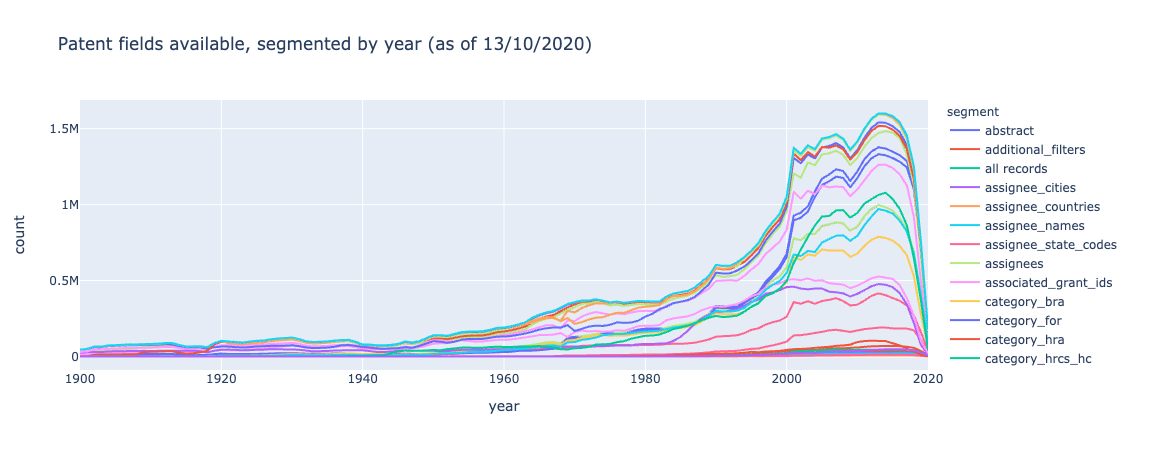

In [36]:
start_year = 1900

# need to sort otherwise the chart is messed up!
temp = seed.query(f"year >= {start_year}").sort_values(["segment", "year"]) 
# 
fig = px.line(temp, x="year", y="count", color="segment",
               title=f"Patent fields available, segmented by year (as of {today})")
plot(fig, filename = 'patents-fields-by-year-count.html', auto_open=False)
fig.show()

## Where to find out more



Please have a look at the [official documentation](https://docs.dimensions.ai/dsl/datasource-patents.html) for more information on Patents.